In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# reading in the train data
train_data = pd.read_csv("C:/DSN datasets/train.csv")
train_data.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,Other,WV,Columbus,0,?,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


In [3]:
train_data.corr()

,months_as_customer,age,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,witnesses,auto_year,_c39,total_claim_amount
months_as_customer,1.000000,0.928464,0.003327,0.021819,0.054413,0.035420,0.058467,0.017111,-0.031500,0.034705,0.008220,0.039612,0.061854,-0.035117,NaN,0.027844
age,0.928464,1.000000,-0.012263,0.011418,0.062774,0.036786,0.077892,0.029891,-0.022743,0.054285,0.005851,0.034870,0.043343,-0.027537,NaN,0.021977
capital-gains,0.003327,-0.012263,1.000000,-0.052645,0.016286,0.064740,-0.003707,0.066114,0.038829,0.001753,-0.062538,0.046241,-0.035091,0.046668,NaN,-0.011207
capital-loss,0.021819,0.011418,-0.052645,1.000000,-0.004377,-0.021659,-0.037264,-0.016135,-0.040260,0.026594,-0.025356,0.083056,-0.036192,-0.073855,NaN,-0.045267
policy_number,0.054413,0.062774,0.016286,-0.004377,1.000000,-0.020572,-0.026701,-0.002253,0.004699,0.014293,-0.022513,0.002318,-0.012154,-0.012792,NaN,-0.048000
policy_deductable,0.035420,0.036786,0.064740,-0.021659,-0.020572,1.000000,0.061939,0.025584,-0.064092,-0.015958,-0.014925,0.015438,0.057188,0.003109,NaN,0.004868
incident_hour_of_the_day,0.058467,0.077892,-0.003707,-0.037264,-0.026701,0.061939,1.000000,0.117887,-0.030181,0.027435,-0.023566,0.014890,-0.019995,0.018870,NaN,0.213462
number_of_vehicles_involved,0.017111,0.029891,0.066114,-0.016135,-0.002253,0.025584,0.117887,1.000000,0.020947,-0.042219,-0.002317,0.024765,-0.047805,0.011743,NaN,0.233480
bodily_injuries,-0.031500,-0.022743,0.038829,-0.040260,0.004699,-0.064092,-0.030181,0.020947,1.000000,0.056265,0.011370,0.050053,-0.046943,-0.006966,NaN,0.029190
policy_annual_premium,0.034705,0.054285,0.001753,0.026594,0.014293,-0.015958,0.027435,-0.042219,0.056265,1.000000,-0.010070,0.041036,0.006507,-0.042772,NaN,0.028740


In [4]:
Train_data=train_data.iloc[:,[1,2,3,4,8,9,14,20,21,24,32,33,34,36]]
Train_data.head(1)

,months_as_customer,age,insured_sex,insured_education_level,capital-gains,capital-loss,policy_deductable,policy_annual_premium,umbrella_limit,incident_type,auto_make,auto_model,auto_year,total_claim_amount
0,239,41,FEMALE,JD,51400,-6300,1000,1325.44,7000000,Parked Car,Mercedes,E400,2013,14386.67


In [5]:
# reading in the train data
test_data = pd.read_csv("C:/DSN datasets/test.csv")
test_data.head(2)

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,...,Total Loss,Ambulance,WV,Springfield,3,?,Audi,A5,2003,NaN
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,...,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,NaN


In [6]:
# Test data now contain columns with visible correletions
Test_data=test_data.iloc[:,[1,2,3,4,8,9,14,20,21,24,32,33,34]]
Test_data.head(2)

,months_as_customer,age,insured_sex,insured_education_level,capital-gains,capital-loss,policy_deductable,policy_annual_premium,umbrella_limit,incident_type,auto_make,auto_model,auto_year
0,5,26,FEMALE,PhD,31500,0,2000,1137.02,0,Single Vehicle Collision,Audi,A5,2003
1,160,33,FEMALE,High School,61600,0,1000,1422.78,0,Multi-vehicle Collision,Nissan,Pathfinder,2006


In [7]:
X=Train_data.drop("total_claim_amount", axis="columns")
y=Train_data["total_claim_amount"]

In [8]:
pd.get_dummies(X)
X=pd.get_dummies(X)
X.head(2)

,months_as_customer,age,capital-gains,capital-loss,policy_deductable,policy_annual_premium,umbrella_limit,auto_year,insured_sex_FEMALE,insured_sex_MALE,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,239,41,51400,-6300,1000,1325.44,7000000,2013,1,0,...,0,0,0,0,0,0,0,0,0,0
1,108,31,0,0,2000,1175.70,0,2006,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [10]:
linear_regression = LinearRegression()
linear_regression.fit(X,y)

LinearRegression()

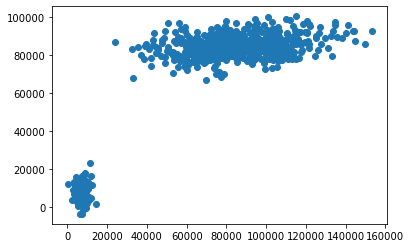

In [11]:
linear_regression.predict(X)
plt.scatter(y,linear_regression.predict(X));

In [35]:
metrics.mean_squared_error(y,linear_regression.predict(X))
np.sqrt(metrics.mean_squared_error(y,linear_regression.predict(X)))
Linear_regre_RMSE = np.sqrt(metrics.mean_squared_error(y,linear_regression.predict(X)))
Linear_regre_RMSE

18794.896231120798

In [13]:
#testing the model on the test data
x= Test_data
pd.get_dummies(x)
x = pd.get_dummies(x)
linear_regression.predict(x)

array([89923.14090461, 78249.39535361, 82124.14387431, 80052.14362423,
       14312.78847845, 93508.18545817, 90912.20232669, 78204.80009471,
       81046.37567516, 17598.24466131, 14709.22996707, 76425.06891655,
         640.58624689, 90444.05011335, 83806.50648176,  7637.30627796,
       81543.32227311, 84364.82990691, 78618.95576164, 85931.30291106,
       87193.81933198,  8479.10433204, 77599.66216665,  8111.07646379,
        7449.13775206, 87273.61798878, 72448.41933968, 85211.17687119,
       72878.86346511, 87185.1446755 , 88537.30516123, 87188.41641638,
       87780.92959703, 80101.65936148, 84815.03661716, 89246.2316358 ,
       70684.55110731,  4241.72826264, 84297.06963292, 93773.92937374,
       85298.47872451, 87672.44999793, 85472.34794268, 78020.91511187,
       81074.91751262, 80170.63803005, 77944.39284079, 99826.02903856,
        2592.60760909, 10574.15621225, 76714.23062206, 85197.70436133,
       87649.13783896, 87054.79186002, 91965.02924325, 80623.23755834,
      

In [14]:
predicted_total_claim_amount=linear_regression.predict(x)

In [15]:
prediction = pd.DataFrame({"Customer_ID": test_data["Customer_ID"], "total_claim_amount":predicted_total_claim_amount})
prediction.head()

,Customer_ID,total_claim_amount
0,Customer_521,89923.140905
1,Customer_737,78249.395354
2,Customer_740,82124.143874
3,Customer_660,80052.143624
4,Customer_411,14312.788478


In [16]:
# converting dataframe to csv

final_prediction=prediction.to_csv('C:/DSN datasets/final_linearmodelprediction.csv')

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoost_Regressor =GradientBoostingRegressor()
GradientBoost_Regressor.fit(X, y)

GradientBoostingRegressor()

In [18]:
GradientBoost_Regressor.predict(X)

array([  8852.13891358,  89195.66557261,  83352.78690596, 105699.60158588,
        78593.07073189,  87358.06426338,  73488.9878891 ,  86211.08012312,
        83213.854349  ,  76364.99706264,  92726.50957089, 104152.15394338,
        83114.28181393, 101197.35494323,  86197.28513942,  80631.80116454,
        83794.54685613,  80661.08408931,  92440.67264179,  75146.43159382,
        89463.77952183,  82389.27158107,  93347.62826913, 105634.95273883,
        88529.13971014,  77839.02378764,  83401.14561022,  80418.91072253,
         9406.87107365,  74691.2542956 ,  85306.99250432,  60738.86349132,
        87274.90248151,  79009.27422831,  81466.74291192,  85313.94750335,
        88467.99179837,  79723.22348347,  76111.36756389,  80687.11609612,
        80642.50752538,  93941.3812467 ,  77945.96785215,  60001.61702073,
        75375.80446417,  82485.09514719,  11792.77750856,  89971.83488663,
        83814.46048316,  85055.20927247, 102074.09635155,  82657.69301293,
        81870.81834403,  

In [37]:
metrics.mean_squared_error(y,GradientBoost_Regressor.predict(X))
np.sqrt(metrics.mean_squared_error(y,GradientBoost_Regressor.predict(X)))
Gradient_Boost_RMSE = np.sqrt(metrics.mean_squared_error(y,GradientBoost_Regressor.predict(X)))
Gradient_Boost_RMSE

14786.89795048946

In [20]:
gradientBoost_prediction=GradientBoost_Regressor.predict(x)

In [21]:
GradientBoost_prediction = pd.DataFrame({"Customer_ID": test_data["Customer_ID"], "total_claim_amount":gradientBoost_prediction})
prediction.head()

,Customer_ID,total_claim_amount
0,Customer_521,89923.140905
1,Customer_737,78249.395354
2,Customer_740,82124.143874
3,Customer_660,80052.143624
4,Customer_411,14312.788478


In [22]:
final_prediction2=GradientBoost_prediction.to_csv('C:/DSN datasets/final_prediction2.csv')

In [23]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X,y)

DecisionTreeRegressor()

In [24]:
decision_tree.predict(x)

array([9.5040000e+04, 6.8280000e+04, 7.8720000e+04, 9.0720000e+04,
       8.9333300e+03, 8.0253330e+04, 1.0928000e+05, 7.6160000e+04,
       6.1600000e+04, 6.9600000e+03, 6.9600000e+03, 8.0253330e+04,
       9.0933300e+03, 8.5200000e+04, 1.1029333e+05, 1.0706670e+04,
       1.0573333e+05, 1.2144000e+05, 9.0720000e+04, 7.0266670e+04,
       1.1088000e+05, 9.4400000e+03, 7.7733330e+04, 6.0800000e+03,
       4.2533300e+03, 8.8320000e+04, 1.1040000e+05, 9.2933330e+04,
       1.0325333e+05, 8.5800000e+04, 1.0400000e+05, 6.7173330e+04,
       7.6853330e+04, 7.9560000e+04, 8.0800000e+04, 6.6666670e+04,
       8.5440000e+04, 6.5333300e+03, 1.2168000e+05, 9.4013330e+04,
       3.9066670e+04, 5.0400000e+04, 1.0325333e+05, 7.0266670e+04,
       5.6906670e+04, 5.0400000e+04, 8.3866670e+04, 6.0360000e+04,
       8.9333300e+03, 6.1600000e+03, 9.0000000e+04, 1.1044000e+05,
       7.1466670e+04, 8.3040000e+04, 1.3440000e+05, 7.2320000e+04,
       1.1762667e+05, 8.5600000e+04, 5.3680000e+04, 9.9733300e

In [25]:
np.sqrt(metrics.mean_squared_error(y,decision_tree.predict(X)))

0.0

In [26]:
decision_tree_prediction=decision_tree.predict(x)

In [27]:
Decision_tree_prediction = pd.DataFrame({"Customer_ID": test_data["Customer_ID"], "total_claim_amount":decision_tree_prediction})
Decision_tree_prediction.head()

,Customer_ID,total_claim_amount
0,Customer_521,95040.00
1,Customer_737,68280.00
2,Customer_740,78720.00
3,Customer_660,90720.00
4,Customer_411,8933.33


In [28]:
Decision_tree=Decision_tree_prediction.to_csv('C:/DSN datasets/final_predict2.csv')

In [29]:
#CatBoost regression Model
from catboost import CatBoostRegressor
CatBoost=CatBoostRegressor()
CatBoost.fit(X,y)
CatBoost.predict(x)
CatBoost_prediction = CatBoost.predict(x)

Learning rate set to 0.036629
0:	learn: 34239.9320291	total: 418ms	remaining: 6m 57s
1:	learn: 33497.1901690	total: 435ms	remaining: 3m 37s
2:	learn: 32862.2422804	total: 450ms	remaining: 2m 29s
3:	learn: 32212.1758763	total: 461ms	remaining: 1m 54s
4:	learn: 31611.4614961	total: 470ms	remaining: 1m 33s
5:	learn: 30982.2587132	total: 474ms	remaining: 1m 18s
6:	learn: 30411.8757736	total: 480ms	remaining: 1m 8s
7:	learn: 29837.6859469	total: 486ms	remaining: 1m
8:	learn: 29311.0203575	total: 492ms	remaining: 54.2s
9:	learn: 28792.5532533	total: 498ms	remaining: 49.3s
10:	learn: 28371.7654186	total: 504ms	remaining: 45.3s
11:	learn: 27957.2474357	total: 510ms	remaining: 42s
12:	learn: 27578.1585604	total: 516ms	remaining: 39.1s
13:	learn: 27096.4450499	total: 518ms	remaining: 36.5s
14:	learn: 26711.5981072	total: 524ms	remaining: 34.4s
15:	learn: 26274.9556021	total: 526ms	remaining: 32.3s
16:	learn: 25886.8683208	total: 532ms	remaining: 30.7s
17:	learn: 25532.9523883	total: 538ms	remain

153:	learn: 16987.0952973	total: 1.41s	remaining: 7.74s
154:	learn: 16962.6054277	total: 1.42s	remaining: 7.72s
155:	learn: 16940.1470276	total: 1.42s	remaining: 7.71s
156:	learn: 16922.8911227	total: 1.43s	remaining: 7.69s
157:	learn: 16904.2100554	total: 1.44s	remaining: 7.68s
158:	learn: 16890.0636461	total: 1.45s	remaining: 7.66s
159:	learn: 16874.8819609	total: 1.46s	remaining: 7.64s
160:	learn: 16858.2524337	total: 1.46s	remaining: 7.62s
161:	learn: 16837.9573207	total: 1.47s	remaining: 7.6s
162:	learn: 16822.4209770	total: 1.48s	remaining: 7.58s
163:	learn: 16803.7490685	total: 1.48s	remaining: 7.57s
164:	learn: 16784.8709676	total: 1.49s	remaining: 7.55s
165:	learn: 16752.5619255	total: 1.5s	remaining: 7.53s
166:	learn: 16730.3485273	total: 1.51s	remaining: 7.52s
167:	learn: 16719.8748956	total: 1.51s	remaining: 7.5s
168:	learn: 16710.5658587	total: 1.52s	remaining: 7.48s
169:	learn: 16692.2158263	total: 1.53s	remaining: 7.46s
170:	learn: 16668.6117644	total: 1.53s	remaining: 7

319:	learn: 13794.3140093	total: 2.56s	remaining: 5.44s
320:	learn: 13786.8283602	total: 2.57s	remaining: 5.43s
321:	learn: 13774.8832370	total: 2.58s	remaining: 5.43s
322:	learn: 13758.2499089	total: 2.58s	remaining: 5.42s
323:	learn: 13745.2439717	total: 2.59s	remaining: 5.41s
324:	learn: 13734.1076912	total: 2.6s	remaining: 5.41s
325:	learn: 13723.9420577	total: 2.61s	remaining: 5.4s
326:	learn: 13702.3762288	total: 2.62s	remaining: 5.38s
327:	learn: 13685.4768552	total: 2.62s	remaining: 5.38s
328:	learn: 13679.9402257	total: 2.63s	remaining: 5.37s
329:	learn: 13671.9007584	total: 2.64s	remaining: 5.36s
330:	learn: 13647.7361121	total: 2.65s	remaining: 5.35s
331:	learn: 13630.6623554	total: 2.65s	remaining: 5.34s
332:	learn: 13609.6633483	total: 2.66s	remaining: 5.33s
333:	learn: 13593.0571438	total: 2.67s	remaining: 5.32s
334:	learn: 13583.2537594	total: 2.67s	remaining: 5.3s
335:	learn: 13558.5601411	total: 2.68s	remaining: 5.29s
336:	learn: 13543.4661273	total: 2.69s	remaining: 5

476:	learn: 11534.8743490	total: 3.71s	remaining: 4.07s
477:	learn: 11525.5917080	total: 3.72s	remaining: 4.06s
478:	learn: 11521.5594677	total: 3.73s	remaining: 4.06s
479:	learn: 11508.1650308	total: 3.74s	remaining: 4.05s
480:	learn: 11495.7991840	total: 3.75s	remaining: 4.04s
481:	learn: 11488.9401534	total: 3.76s	remaining: 4.04s
482:	learn: 11477.1778839	total: 3.76s	remaining: 4.03s
483:	learn: 11466.8210199	total: 3.77s	remaining: 4.02s
484:	learn: 11458.4595984	total: 3.78s	remaining: 4.01s
485:	learn: 11443.9487785	total: 3.79s	remaining: 4s
486:	learn: 11431.6284843	total: 3.79s	remaining: 4s
487:	learn: 11404.4487058	total: 3.8s	remaining: 3.99s
488:	learn: 11392.1407031	total: 3.81s	remaining: 3.98s
489:	learn: 11377.6806689	total: 3.81s	remaining: 3.97s
490:	learn: 11364.4337878	total: 3.82s	remaining: 3.96s
491:	learn: 11348.5381508	total: 3.83s	remaining: 3.95s
492:	learn: 11331.6951389	total: 3.83s	remaining: 3.94s
493:	learn: 11312.7859611	total: 3.84s	remaining: 3.93s

642:	learn: 9561.6887368	total: 4.88s	remaining: 2.71s
643:	learn: 9552.9694079	total: 4.89s	remaining: 2.7s
644:	learn: 9544.1072430	total: 4.9s	remaining: 2.69s
645:	learn: 9532.6230389	total: 4.9s	remaining: 2.69s
646:	learn: 9526.1577544	total: 4.91s	remaining: 2.68s
647:	learn: 9519.4046905	total: 4.92s	remaining: 2.67s
648:	learn: 9503.9199744	total: 4.92s	remaining: 2.66s
649:	learn: 9492.6937119	total: 4.93s	remaining: 2.65s
650:	learn: 9480.9502940	total: 4.94s	remaining: 2.65s
651:	learn: 9474.8828782	total: 4.94s	remaining: 2.64s
652:	learn: 9467.6523497	total: 4.95s	remaining: 2.63s
653:	learn: 9461.1432938	total: 4.96s	remaining: 2.62s
654:	learn: 9452.0086594	total: 4.96s	remaining: 2.61s
655:	learn: 9443.1860265	total: 4.97s	remaining: 2.6s
656:	learn: 9427.6845620	total: 4.97s	remaining: 2.6s
657:	learn: 9414.1171791	total: 4.98s	remaining: 2.59s
658:	learn: 9405.5619595	total: 4.99s	remaining: 2.58s
659:	learn: 9392.4580075	total: 4.99s	remaining: 2.57s
660:	learn: 938

797:	learn: 8136.5791311	total: 6.04s	remaining: 1.53s
798:	learn: 8125.5440692	total: 6.05s	remaining: 1.52s
799:	learn: 8115.1996648	total: 6.06s	remaining: 1.51s
800:	learn: 8105.8541296	total: 6.07s	remaining: 1.51s
801:	learn: 8098.2707874	total: 6.08s	remaining: 1.5s
802:	learn: 8092.6553167	total: 6.09s	remaining: 1.49s
803:	learn: 8081.1180932	total: 6.1s	remaining: 1.49s
804:	learn: 8074.8269548	total: 6.11s	remaining: 1.48s
805:	learn: 8066.8810175	total: 6.12s	remaining: 1.47s
806:	learn: 8063.5213673	total: 6.12s	remaining: 1.46s
807:	learn: 8050.7736356	total: 6.13s	remaining: 1.46s
808:	learn: 8048.8853773	total: 6.14s	remaining: 1.45s
809:	learn: 8040.7773741	total: 6.14s	remaining: 1.44s
810:	learn: 8029.3711297	total: 6.15s	remaining: 1.43s
811:	learn: 8018.8974878	total: 6.16s	remaining: 1.43s
812:	learn: 8008.8737343	total: 6.16s	remaining: 1.42s
813:	learn: 8000.9870846	total: 6.17s	remaining: 1.41s
814:	learn: 7990.8416986	total: 6.18s	remaining: 1.4s
815:	learn: 7

955:	learn: 6961.4077459	total: 7.2s	remaining: 332ms
956:	learn: 6953.8909381	total: 7.21s	remaining: 324ms
957:	learn: 6946.8260983	total: 7.22s	remaining: 316ms
958:	learn: 6943.0101948	total: 7.23s	remaining: 309ms
959:	learn: 6938.9922009	total: 7.23s	remaining: 301ms
960:	learn: 6934.5761499	total: 7.24s	remaining: 294ms
961:	learn: 6923.8600096	total: 7.25s	remaining: 286ms
962:	learn: 6914.3513430	total: 7.26s	remaining: 279ms
963:	learn: 6911.2609059	total: 7.26s	remaining: 271ms
964:	learn: 6907.0082823	total: 7.27s	remaining: 264ms
965:	learn: 6902.2042468	total: 7.28s	remaining: 256ms
966:	learn: 6895.0275579	total: 7.29s	remaining: 249ms
967:	learn: 6888.2196744	total: 7.29s	remaining: 241ms
968:	learn: 6881.3974830	total: 7.3s	remaining: 234ms
969:	learn: 6876.5902851	total: 7.31s	remaining: 226ms
970:	learn: 6868.5570694	total: 7.31s	remaining: 218ms
971:	learn: 6863.4328214	total: 7.32s	remaining: 211ms
972:	learn: 6858.0661800	total: 7.33s	remaining: 203ms
973:	learn: 

In [30]:
CatBoost_prediction

array([ 83561.10070171,  76368.81645988,  86085.92687292,  92843.30963208,
        16376.04160906,  84584.85450387,  83619.91597925,  73630.47352736,
        80614.04150622,  17199.36463605,   6876.11926813,  73318.11376768,
         3001.13474   ,  82865.6606754 ,  93358.61594427,   6784.85250472,
        74492.80827041,  84757.77779814,  82243.78145782,  86390.06425646,
        81989.10507562,   6562.48005649,  81930.1647466 ,   6041.5235913 ,
         6043.05913826, 100288.31591054,  67208.72928891,  99060.81827695,
        72427.95850533,  98755.62095615,  89451.74719874,  90116.82616241,
        94016.25323923,  76046.68486635,  88264.52648737,  81273.01204256,
        74879.80038826,   3556.80070203, 101618.24944482,  99640.98082836,
        80924.45537625,  88518.54614461,  83396.37771464,  93682.15286667,
        79053.32123157,  84653.06700605,  80711.08705288,  92900.34336343,
         2038.32857626,   7562.69773254,  79286.99994139,  74021.45193428,
        87415.49810768,  

In [39]:
metrics.mean_squared_error(y,CatBoost.predict(X))
np.sqrt(metrics.mean_squared_error(y,CatBoost.predict(X)))
CatBoost_RMSE = np.sqrt(metrics.mean_squared_error(y,CatBoost.predict(X)))
CatBoost_RMSE

6676.191643398966

In [32]:
# Light GBM regression model 
import lightgbm as lgb
gbm = lgb.LGBMRegressor()
gbm.fit(X,y)
gbm.predict(X)

array([ 13807.00121824,  82148.05672353,  82123.80711261, 108750.53852937,
        75252.5070726 ,  83566.24061384,  71482.32879681,  92039.06873837,
        70072.84640717,  56909.39809188,  88900.80761393, 117305.29565943,
        92127.62348389, 111347.43799552,  89567.66444091,  81332.58189894,
        83191.91058628,  71127.50319442, 104558.64059675,  58373.25813603,
       100781.37363669,  87656.41333963, 105157.0720102 , 112507.72873007,
        88917.12587614,  81383.62668968,  79480.82912955,  68895.18167197,
         6655.56988539,  65619.14300866,  84647.90216185,  54591.67510715,
       107744.09856324,  81766.43167284,  90929.3609611 , 109747.76556228,
       101592.64564026,  88103.26190182,  68817.80759209,  94342.54961065,
        74568.86453915, 105101.42509933,  68873.97797553,  53074.69833048,
        70627.76314863,  86939.56600364,  11430.14075201,  89194.78725181,
        92001.5512035 ,  84333.61911603, 116082.59676245,  90350.18045639,
        76090.33844646,  

In [40]:
metrics.mean_squared_error(y,gbm.predict(X))
np.sqrt(metrics.mean_squared_error(y,gbm.predict(X)))
Light_GBM_RMSE = np.sqrt(metrics.mean_squared_error(y,gbm.predict(X)))
Light_GBM_RMSE

7107.5513222417685

In [44]:
# model evaluation
algos = ["Linear Regression", "Gradient Boost","Catboost", "Light GBM"]
RMSE = [Linear_regre_RMSE, Gradient_Boost_RMSE, CatBoost_RMSE, Light_GBM_RMSE]
Model_evaluation = pd.DataFrame({"MODEL" : algos, "RMSE" : RMSE})
Model_evaluation

,MODEL,RMSE
0,Linear Regression,18794.896231
1,Gradient Boost,14786.897950
2,Catboost,6676.191643
3,Light GBM,7107.551322
